# Transfer functions
Going back to the basics: the state space in time domain.
$$ \dot x = Ax + Bu, $$
$$ y = Cx + Du.$$
Now taking that sweet Laplace transform, including the initial value:
$$ s X(s) - x(0) = AX(s) + BU(s), $$
$$ Y(s) = CX(s) + DU(s).$$
This allows us to look at something interesting:
$$\implies (sI -A) X(s) = BU(s) + x(0) \implies X(s) = (sI -A)^{-1} BU(s) + (sI -A)^{-1}x(0) $$
$$ \therefore Y(s) = CX(s) + DU(s) \implies Y(s) = C(sI -A)^{-1} BU(s) + DU(s) + C(sI -A)^{-1}x(0) \implies Y(s) = \underbrace{(C(sI -A)^{-1} B + D)U(s)}_\text{Steady state solution} + \underbrace{C(sI -A)^{-1}x(0)}_\text{Transient}. $$
Just looking at the steady state solution, we can find the ratio between the steady output and steady input, called the *transfer function* $\frac{Y(s)}{U(s)} = G_{yu}(s)$,
$$ \frac{Y(s)}{U(s)} = G_{yu}(s) = C(sI -A)^{-1} B + D.$$
But we don't know what the transient in the time domain is, and I want to know! To find it, I am going to make two statements now that you can either believe or figure out for yourself:
- the steady state solution is the inhomogeneous ODE solution, and
- the transient is the homogeneous ODE solution, and
- the transient is relative to the steady state solution.
Then if we look at the time domain homogeneous solution,
$$\dot{ \tilde x}(t) = A\tilde x(t),\; \tilde x = x_0 - x_\text{ss} \implies \tilde x(t) = e^{At}\tilde x(0) \implies y(t) = Ce^{At}\tilde x(0) \iff e^{At} = \mathcal{L}^{-1}\{(sI -A)^{-1}\}.$$
for $x_\text{ss} = (sI -A)^{-1} B$. In the time domain block you saw how to evaluate $e^{At}$ with a Taylor series.

Enough maths, I want pictures! We'll decompose some step responses.

<IPython.core.display.Javascript object>

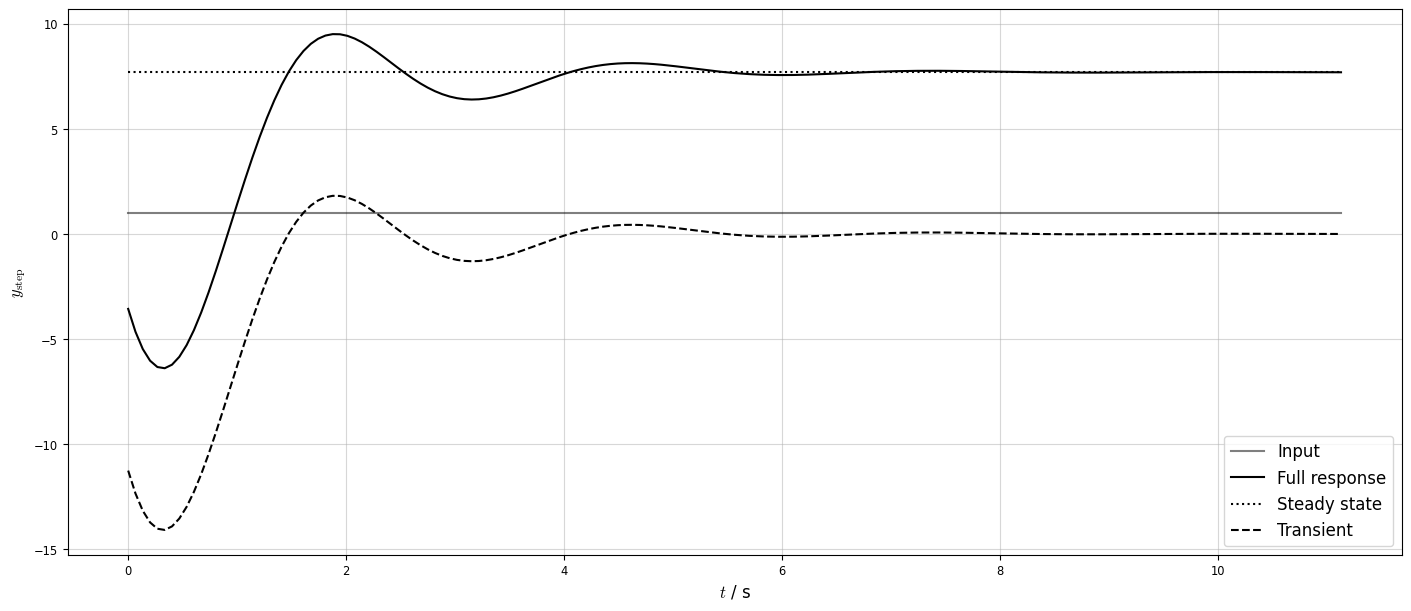

In [6]:
%matplotlib notebook
import numpy as np
from scipy.linalg import expm
import control as cm
import matplotlib.pyplot as plt
from IPython import display
from helperFunctions import *
setPlotStyle()

P = cm.rss(5)

x0 = np.random.randn(P.nstates)
stepres = cm.step_response(P, initial_state=x0)

xss = np.linalg.inv(0*np.eye(P.nstates)-P.A) @ P.B
yss = P.C @ xss + P.D
ytr = [P.C @ expm(P.A * t) @ (x0 - xss.squeeze()) for t in stepres.time ]

fig, ax = plt.subplots()
ax.plot(stepres.time, stepres.inputs, 'k', alpha=.5, label="Input")
ax.plot(stepres.time, stepres.outputs, 'k', label="Full response")
ax.plot(stepres.time, np.ones_like(stepres.time)*yss[0], 'k:', label="Steady state")
ax.plot(stepres.time, np.squeeze(ytr), 'k--', label="Transient")
ax.legend()
ax.set(xlabel="$t$ / s", ylabel=r"$y_\text{step}$")
display(fig)


Looks cool, I guess... the steady output is a bit boring to be honest. I'm working on adding two more cases: a ramp input and a nonzero mean sinusoid input, but they're not ready yet :(

## ODEs
For actual ODEs the transfer function is found easier, for example a 2nd order system (mass-spring-dampner systems are the textbook example, here with mass position $p$):
$$ m\ddot p + b\dot p + k p = \dot u - q u \overset{\mathcal{L}}{\rightarrow} (ms^2 + bs + k)P(s) = (s - q) U(s).$$
$$ \rightarrow \frac{P(s)}{U(s)} = G_{pu}(s) = \frac{s - q}{ms^2 + bs + k}.$$
Note that I ignored the initial state here, because I only wanted the transfer function.
